## About the dataset

In [20]:
import pandas as pd
dataset = pd.read_csv("data/tweets.csv", encoding = 'ISO-8859-1')
dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


## Generating Word Frequency

In [37]:
def gen_freq(text):
    word_list = []
    for word in text.split(): ## or word_tokenize(text)
        word_list.extend(word)
    
    word_freq = pd.Series(word_list).value_counts()
#     word_freq=word_freq[:20] -- top 20 words
    return word_freq
# gen_freq(dataset.text.str)


## EDA using Word Clouds

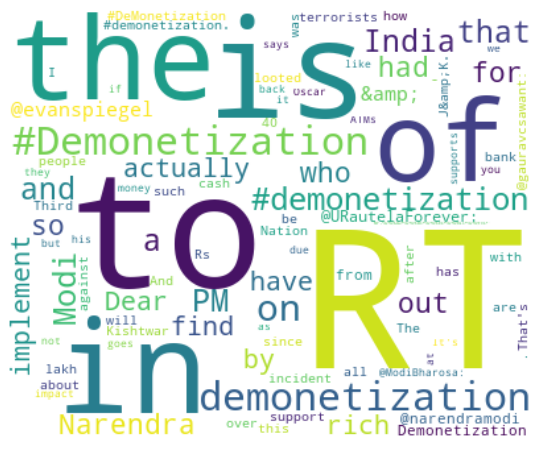

In [39]:
## pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_freq = gen_freq(dataset.text.str)

## generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Note:
- noise in form of RT
- stop words
- domenization occuring multiple times in figure

In [48]:
## Text Cleaning

import re

def clean_text(text):
    # Remove RT
    text = re.sub(r'RT', '', text) ## finds and replaces RT with empty string
    
    # Fix &
    text = re.sub(r'&amp;', '&', text)
    
    # Remove punctiations
    text = re.sub(r'[?!.;:,#@-]','',text)
    
    text = text.lower()
    return text

In [49]:
### Stop Words Removal
from wordcloud import STOPWORDS
print(STOPWORDS)

{'only', 'down', 'who', "i'd", 'all', 'once', 'yourselves', 'also', 'a', 'of', 'some', "wasn't", "we'd", 'himself', 'our', "couldn't", 'they', 'while', 'about', "he'll", 'an', 'through', "shouldn't", 'below', 'by', 'him', "wouldn't", 'her', 'me', 'both', "i'll", 'my', "they'll", "aren't", 'this', "she's", 'http', "i'm", "it's", "weren't", 'cannot', 'not', "he'd", 'having', 'get', 'their', 'yours', "haven't", 'itself', 'as', 'before', 'theirs', 'for', 'to', "who's", 'www', "isn't", 'its', 'did', 'during', 'r', 'same', "they've", 'shall', "why's", 'she', "we'll", 'but', 'own', "when's", 'you', 'from', 'than', "he's", "doesn't", "you're", "hadn't", 'until', 'yourself', 'there', 'myself', 'like', 'in', 'were', 'otherwise', 'because', 'has', "hasn't", "you'd", "i've", 'on', 'so', 'hers', 'and', 'do', 'with', 'against', "can't", 'your', 'each', 'his', 'it', 'here', 'most', 'when', 'would', 'however', 'how', 'ought', 'since', 'those', "you've", 'com', 'ever', 'up', 'he', 'i', 'where', 'at', '

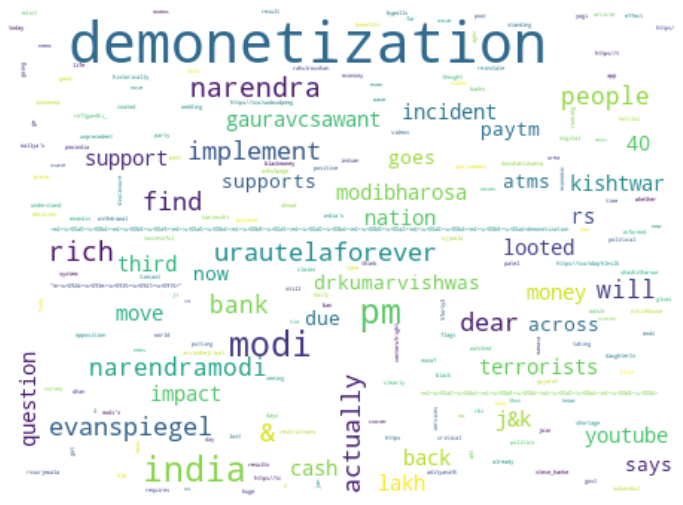

In [50]:
text = dataset.text.apply(lambda x:clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors= 'ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()